In [1]:
import torch

In [2]:
import numpy as np

In [3]:
import torchvision
from torchvision.datasets import MNIST

In [4]:
dataset = MNIST(root='data/',download=True)

In [5]:
len(dataset)

60000

In [6]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x20D95685850>, 5)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


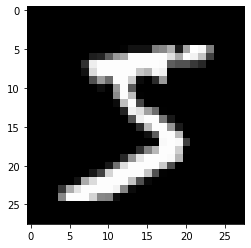

In [9]:
image , label = dataset[0]
plt.imshow(image,cmap='gray')
print('Label:',label)

Label: 3


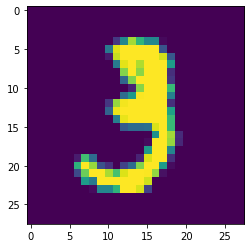

In [10]:
image , label = dataset[10]
plt.imshow(image)
print('Label:',label)

In [11]:
import torchvision.transforms as transforms

In [12]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [13]:
img_tensor , label = dataset[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[:,10:20,5:17])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.0039, 0.6039, 0.9922,
          0.3529, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5451, 0.9922,
          0.7451, 0.0078, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431, 0.7451,
          0.9922, 0.2745, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1373,
          0.9451, 0.8824, 0.6275, 0.4235],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.3176, 0.9412, 0.9922, 0.9922],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.1765, 0.7294, 0.9922],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0627, 0.3647],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

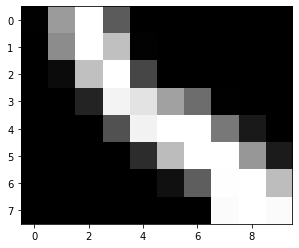

In [15]:
plt.imshow(img_tensor[0,10:18,10:20],cmap='gray')

In [16]:
import numpy as np
def split_indices(n,val_pct):
    # Determine size of validation
    n_val = int(val_pct*n)
    #create random permutation of 0 to n-1
    idxs = np.random.permutation(n)
    # pick first n_val indices for validation set
    return idxs[n_val:] , idxs[:n_val]

In [17]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)

In [18]:
print(len(train_indices),len(val_indices))

48000 12000


In [19]:
print('Sample validation indices :',val_indices[:20])

Sample validation indices : [27636  3400 50521   994 23925 42046 26829 26984 31993  7201  4882 15971
 39690 58178  3177 53684 27712 13134  1553 13739]


In [20]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [21]:
batch_size = 100

# traning sampler and data loader
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,batch_size,sampler=train_sampler)

# validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,batch_size,sampler=val_sampler)

In [22]:
import torch.nn as nn

input_size = 28*28 # each image is 28 X 28 Pixels 
num_classes = 10 # we want 10 class classifier
# Logistic regression model
model = nn.Linear(input_size,num_classes)


In [23]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0240, -0.0250,  0.0201,  ..., -0.0258, -0.0008,  0.0357],
        [ 0.0129,  0.0230,  0.0099,  ..., -0.0246, -0.0244, -0.0194],
        [-0.0103,  0.0334,  0.0355,  ...,  0.0285, -0.0064,  0.0299],
        ...,
        [-0.0027, -0.0196, -0.0137,  ..., -0.0293, -0.0038, -0.0248],
        [-0.0200, -0.0277, -0.0082,  ...,  0.0033, -0.0287, -0.0157],
        [ 0.0170, -0.0117, -0.0003,  ..., -0.0230,  0.0320, -0.0057]],
       requires_grad=True)

In [24]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0027, -0.0045,  0.0239, -0.0316, -0.0217,  0.0237, -0.0320,  0.0287,
        -0.0283, -0.0010], requires_grad=True)

In [25]:
for images , labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([7, 0, 1, 5, 4, 5, 4, 3, 4, 9, 1, 7, 5, 4, 8, 9, 1, 3, 2, 4, 7, 4, 8, 4,
        5, 9, 8, 5, 1, 2, 1, 1, 6, 7, 3, 5, 2, 1, 3, 7, 3, 7, 4, 1, 2, 3, 2, 0,
        0, 0, 0, 5, 3, 1, 2, 5, 2, 0, 0, 4, 6, 4, 5, 2, 0, 3, 6, 5, 8, 6, 7, 0,
        2, 6, 9, 0, 3, 1, 7, 2, 2, 0, 6, 1, 1, 9, 6, 7, 6, 3, 5, 5, 0, 8, 6, 1,
        1, 9, 8, 9])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [26]:
class MnistModel (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [27]:
print(model.linear.weight.shape,model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0200, -0.0059, -0.0280,  ..., -0.0303,  0.0294,  0.0263],
         [-0.0161,  0.0149,  0.0252,  ...,  0.0171,  0.0288,  0.0138],
         [-0.0007, -0.0128, -0.0041,  ..., -0.0195,  0.0317,  0.0236],
         ...,
         [-0.0048, -0.0308, -0.0067,  ...,  0.0065, -0.0086, -0.0059],
         [ 0.0217,  0.0307,  0.0278,  ..., -0.0089,  0.0172,  0.0131],
         [ 0.0094, -0.0061, -0.0010,  ...,  0.0293, -0.0059,  0.0179]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0099,  0.0164, -0.0042,  0.0072, -0.0274,  0.0206, -0.0121,  0.0287,
          0.0009, -0.0150], requires_grad=True)]

In [28]:
for images , labels in train_loader:
    outputs = model(images)
    break

print('Output.shape:',outputs.shape)
print('Sample outputs:\n',outputs[:2].data)

Output.shape: torch.Size([100, 10])
Sample outputs:
 tensor([[ 0.1112, -0.3217,  0.0129,  0.1749, -0.0169, -0.1786,  0.1085,  0.0448,
          0.2040, -0.0488],
        [-0.4346, -0.1074,  0.0605,  0.3644, -0.0742, -0.1194, -0.0897, -0.0465,
         -0.3738, -0.1733]])


In [29]:
import torch.nn.functional as F

In [30]:
# apply softmax for each output row
probs = F.softmax(outputs,dim=1)

# Look at sample probability
print('Sample Probability:\n',probs[:2].data)

# add up the probabilities of an output row
print('Sum of Probability:',torch.sum(probs[0]).item())

Sample Probability:
 tensor([[0.1095, 0.0710, 0.0993, 0.1167, 0.0963, 0.0820, 0.1092, 0.1025, 0.1202,
         0.0933],
        [0.0699, 0.0970, 0.1147, 0.1554, 0.1002, 0.0958, 0.0987, 0.1031, 0.0743,
         0.0908]])
Sum of Probability: 0.9999998807907104


In [31]:
max_probs , preds = torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([8, 3, 3, 8, 3, 3, 2, 2, 3, 5, 2, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 1, 3,
        8, 3, 9, 3, 2, 3, 8, 3, 3, 3, 3, 8, 2, 3, 2, 3, 5, 3, 2, 2, 3, 3, 3, 5,
        3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 2, 3, 7, 7, 2, 3, 3, 7, 3, 3, 3, 3, 8, 8,
        2, 8, 2, 7, 1, 2, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 8, 5, 8, 2, 8, 8, 3,
        3, 2, 8, 3])
tensor([0.1202, 0.1554, 0.1526, 0.1100, 0.1364, 0.1212, 0.1429, 0.1670, 0.1338,
        0.1351, 0.1305, 0.1555, 0.1127, 0.1671, 0.1152, 0.1576, 0.1309, 0.1458,
        0.1250, 0.1224, 0.1194, 0.1177, 0.1453, 0.1416, 0.1240, 0.1262, 0.1244,
        0.1559, 0.1226, 0.1477, 0.1232, 0.1290, 0.1326, 0.1454, 0.1360, 0.1144,
        0.1423, 0.1380, 0.1339, 0.1346, 0.1283, 0.1301, 0.1284, 0.1374, 0.1583,
        0.1638, 0.1292, 0.1321, 0.1354, 0.1705, 0.1551, 0.1343, 0.1517, 0.1314,
        0.1149, 0.1494, 0.1646, 0.1200, 0.1400, 0.1460, 0.1373, 0.1283, 0.1348,
        0.1559, 0.1741, 0.1358, 0.1778, 0.1529, 0.1244, 0.1498, 0.1155, 0.1225,
        0.1359, 0.1

In [33]:
labels

tensor([0, 6, 6, 7, 7, 6, 2, 2, 2, 6, 1, 7, 1, 9, 6, 2, 3, 4, 2, 1, 1, 1, 2, 6,
        4, 1, 1, 9, 6, 8, 5, 2, 5, 9, 9, 1, 2, 3, 2, 9, 1, 9, 3, 7, 7, 3, 9, 5,
        9, 9, 9, 3, 0, 1, 0, 6, 7, 0, 5, 7, 6, 2, 9, 7, 5, 6, 6, 9, 5, 0, 5, 1,
        3, 5, 2, 6, 7, 1, 4, 8, 2, 4, 7, 6, 5, 0, 1, 4, 0, 1, 6, 1, 2, 0, 8, 8,
        8, 2, 1, 7])

In [34]:
def accuracy(l1,l2):
    return torch.sum(l1==l2).item()/len(l1)

In [35]:
labels == preds

tensor([False, False, False, False, False, False,  True,  True, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True,  True, False,
        False, False, False, False, False,  True, False,  True, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False,  True, False,  True, False, False,  True, False, False])

In [36]:
torch.sum(labels==preds).item()/len(labels)

0.13

In [37]:
accuracy(labels,preds)

0.13

In [39]:
x = 0.000001
y = 0.9999
import math
-math.log(x)
-math.log(y)

0.00010000500033334732

In [40]:
loss_fn = F.cross_entropy

In [41]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3085, grad_fn=<NllLossBackward>)


In [43]:
# optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [44]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
    # Calcilate loss
    preds = model(xb)
    loss = loss_func(preds,yb)
    
    if opt is not None:
        # compute Gradients
        loss.backward()
        # update parameters
        opt.step()
        # reset grdients
        opt.zero_grad()
        
    metric_result = None
    if metric is not None:
        # compute metric
        metric_result = metric(preds,yb)
        
        
    return loss.item(),len(xb),metric_result

In [45]:
def evaluate (model,loss_fn,valid_dl,metric=None):
    with torch.no_grad():
        # pass each batch through the model
        results = [loss_batch(model,loss_fn,xb,yb,metric=metric)
                  for xb,yb in valid_dl]
        # separate losses , counts and metrics
        losses , nums , metrics = zip(*results)
        # total size of the dataset
        total = np.sum(nums)
        # average loss accross batches
        avg_loss = np.sum(np.multiply(losses,nums))/total
        avg_metric = None
        if metric is not None:
            # average of metric accross batches
            avg_metric = np.sum(np.multiply(metrics,nums))/total
        
        return avg_loss,total,avg_metric

In [46]:
def accuracy(outputs,labels):
    _, preds = torch.max(outputs,dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [51]:
val_loss , total , val_acc = evaluate(model,loss_fn,val_loader,metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss,val_acc))

Loss: 2.3077, Accuracy: 0.1188


In [52]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
    for epoch in range(epochs):
        # Traning Model
        for xb, yb in train_dl:
            loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
        
        # Evaluation
        result = evaluate(model,loss_fn,valid_dl,metric)
        val_loss , total, val_metric = result
        
        # printing progress
        if metric is None:
            print('Epoch [{}/{}] , Loss: {:.4f}'.format(epoch+1,epochs,val_loss))
        else:
            print('Epoch [{}/{}] , Loss: {:.4f}, {}: {:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

In [53]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [54]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5] , Loss: 1.9069, accuracy: 0.6647
Epoch [2/5] , Loss: 1.6048, accuracy: 0.7460
Epoch [3/5] , Loss: 1.3921, accuracy: 0.7720
Epoch [4/5] , Loss: 1.2390, accuracy: 0.7880
Epoch [5/5] , Loss: 1.1256, accuracy: 0.8002


In [55]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5] , Loss: 1.0390, accuracy: 0.8077
Epoch [2/5] , Loss: 0.9709, accuracy: 0.8144
Epoch [3/5] , Loss: 0.9159, accuracy: 0.8204
Epoch [4/5] , Loss: 0.8705, accuracy: 0.8253
Epoch [5/5] , Loss: 0.8326, accuracy: 0.8300


In [56]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5] , Loss: 0.8002, accuracy: 0.8333
Epoch [2/5] , Loss: 0.7723, accuracy: 0.8363
Epoch [3/5] , Loss: 0.7479, accuracy: 0.8402
Epoch [4/5] , Loss: 0.7264, accuracy: 0.8421
Epoch [5/5] , Loss: 0.7074, accuracy: 0.8438


In [57]:
fit(5,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch [1/5] , Loss: 0.6903, accuracy: 0.8451
Epoch [2/5] , Loss: 0.6748, accuracy: 0.8469
Epoch [3/5] , Loss: 0.6609, accuracy: 0.8486
Epoch [4/5] , Loss: 0.6482, accuracy: 0.8508
Epoch [5/5] , Loss: 0.6365, accuracy: 0.8523


Text(0.5, 1.0, 'Accuracy Vs. No of Epochs')

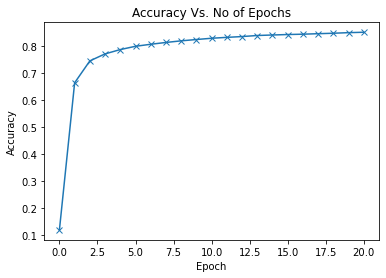

In [61]:
accuracies = [0.1188,
             0.6647,0.7460,0.7720,0.7880,0.8002,
             0.8077,0.8144,0.8204,0.8253,0.8300,
             0.8333,0.8363,0.8402,0.8421,0.8438,
             0.8451,0.8469,0.8486,0.8508,0.8523]
plt.plot(accuracies , '-x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs. No of Epochs')